<a href="https://colab.research.google.com/github/zac2047-ctrl/Data-Bootcamp-Final---Winston-Joshi-Colangelo/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


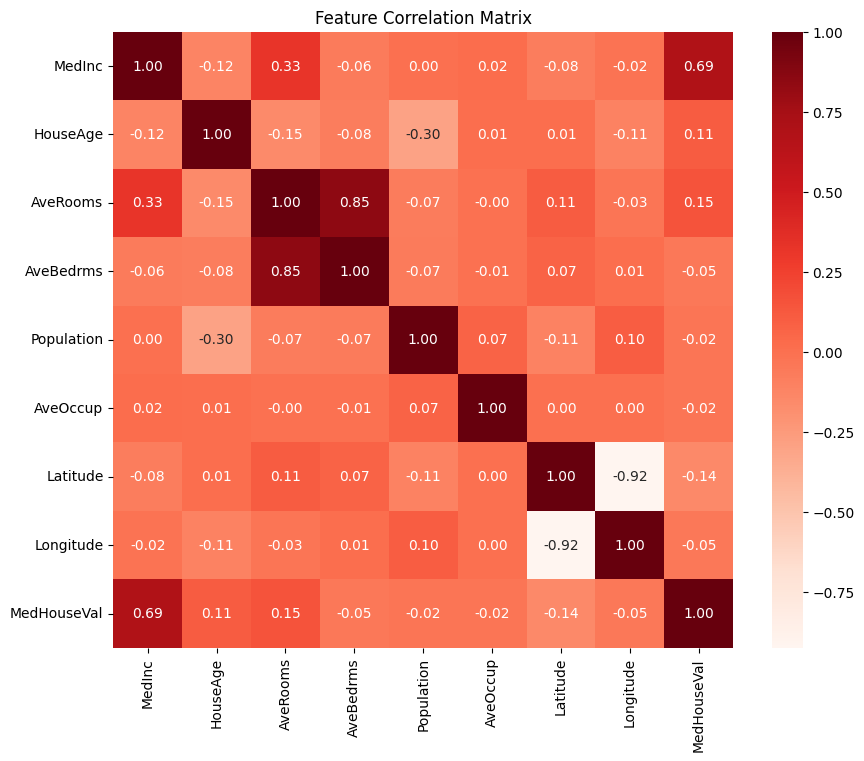

--- Linear Regression Results ---
MSE: 0.5559
R2 Score: 0.5758

--- Random Forest Results ---
MSE: 0.2552
R2 Score: 0.8053



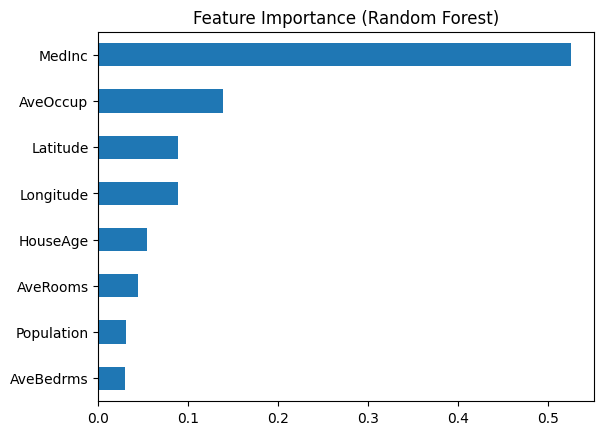

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Loading & EDA
# fetch data  from sklearn
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

print("Data Shape:", df.shape)
print(df.head())

# Visualization: Correlation Heatmap
# Check for correlation with 'MedHouseVal'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Visualization: Geospatial Heatmap
# Shows where high-value homes are clustered
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)
heat_data = df[['Latitude', 'Longitude', 'MedHouseVal']].values
HeatMap(heat_data, radius=10, blur=15).add_to(m)
m.save('housing_heatmap.html')

# 2. Modeling
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)

# Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)

# 3. Evaluation & Interpretation
def print_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred) # R2 explains the percent of variation captured by the model
    print(f"--- {name} Results ---")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")

print_metrics("Linear Regression", y_test, lr_preds)
print_metrics("Random Forest", y_test, rf_preds)

# Feature Importance
# Tree-based models allow us to see which features drove predictions
rf_model = rf_pipeline.named_steps['model']
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importance (Random Forest)")
plt.show()

In [ ]:
#Based on the course sources, here is why this workflow qualifies as a predictive model:
• It uses algorithms to learn relationships: The code utilizes Linear Regression, which the sources define as a model that learns parameters (coefficients) to map input features to a target. It also uses a Random Forest, described as a meta-estimator that fits multiple decision trees to improve "predictive accuracy" and control over-fitting.
• It targets a specific variable: The code sets y = df['MedHouseVal'] and X as the other features. The goal is to predict the continuous variable MedHouseVal (Median House Value) based on the input features, which is the definition of a regression task.
• It evaluates on unseen data: The code uses train_test_split to create a holdout set (X_test, y_test). The sources emphasize that to understand performance for future predictions, models must be evaluated on "data the model has not seen in the past".
• It quantifies performance: The code calculates Mean Squared Error (MSE), which measures the average squared difference between estimated values and the actual value. It also calculates the R
2
  score, which represents the percentage of variation explained by the model.